# 12-gdal-preprocessing
> Preprocessing our data in GDAL and outputting CSVs for ML models

See notebook 11 for imports and installs.

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# Replace with the path to your data file. Use the file with the .tif extension
file_2001 = './data/VDS Team Data Share/CONUS2001_ClipAOI.tif'
file_2004 = './data/VDS Team Data Share/CONUS2004_ClipAOI.tif'
file_2006 = './data/VDS Team Data Share/CONUS2001_ClipAOI.tif'
file_2008 = './data/VDS Team Data Share/CONUS2004_ClipAOI.tif'
file_2011 = './data/VDS Team Data Share/CONUS2004_ClipAOI.tif'
file_2013 = './data/VDS Team Data Share/CONUS2001_ClipAOI.tif'
file_2016 = './data/VDS Team Data Share/CONUS2004_ClipAOI.tif'
file_2019 = './data/VDS Team Data Share/CONUS2004_ClipAOI.tif'

### Preprocess function

Change the output file path to a folder where you want the files to go.

Paramater Note:
srcWin = [xoff, yoff, xsize, ysize]

Outputs:
- ds_year_t.tif (a 1000 x 1000 subset of the tif file for that year)
- ds_year_tw.tif (a resampled subset of the above tif file, resolution defaults to 100)
- ds_year_tw.xyz (an xyz file with x=xcoord, y=ycoord, and z = raster value)
- ds_year_tw.csv (final csv contains coordinates of each pixel and the value)

In [110]:
def preprocess(file, year, resolution=100, xoff=8000, yoff=8000, size=1000):
    output = './data/preprocess/ds_' + str(year) + '_' + str(xoff) + '_' + str(yoff)
    ds = gdal.Open(file)
    ds_t = gdal.Translate(output + '_t.tif', ds, srcWin = [xoff, yoff, size, size])
    ds_tw = gdal.Warp(output + '_tw.tif', ds_t, xRes = resolution, yRes = resolution)
    xyz = gdal.Translate(output + '_tw.xyz', ds_tw)
    df = pd.read_csv(output + '_tw.xyz', sep=" ", header = None)
    df.columns = ['x','y',str(year)]
    df.to_csv(output + '_tw.csv')
    return df

### Creating Big CSV File

In [111]:
def visualize(path):
    ds = gdal.Open(path)
    band = ds.GetRasterBand(1)
    array = band.ReadAsArray()
    plt.figure(figsize=(10, 10))
    plt.imshow(array)
    plt.colorbar()

In [112]:
files = [file_2001, file_2004, file_2006, file_2008, file_2011, file_2013, file_2016, file_2019]
years = [2001,2004,2006,2008,2011,2013,2016,2019]

In [117]:
def create_stats(files, resolution=100, xoff=8000, yoff=8000, size=1000):
    df_01 = preprocess(files[0], years[0], resolution=resolution, xoff=xoff, yoff=yoff, size=size)
    df_01['id'] = df_01.index
    frames = [df_01['id'], df_01['x'], df_01['y']]
    for i in range(1,8):
        df = preprocess(files[i], years[i], resolution=resolution, xoff=xoff, yoff=yoff, size=size)
        frames.append(df[str(years[i])])
    result = pd.concat(frames, axis=1)
    output = './data/stats_' + str(xoff) + '_' + str(yoff) + '.csv'
    result.to_csv(output)
    visualize('./data/preprocess/ds_2001_' + str(xoff) + '_' + str(yoff) + '_tw.tif')
    return result

In [122]:
#Columns: 35165
#Rows: 17975

,id,x,y,2004,2006,2008,2011,2013,2016,2019
0,0,664778.237262,1.647496e+06,42,42,42,42,42,42,42
1,1,664878.237262,1.647496e+06,42,42,42,42,42,42,42
2,2,664978.237262,1.647496e+06,43,41,43,43,41,43,43
3,3,665078.237262,1.647496e+06,41,41,41,41,41,41,41
4,4,665178.237262,1.647496e+06,41,41,41,41,41,41,41
...,...,...,...,...,...,...,...,...,...,...
89995,89995,694278.237262,1.617596e+06,41,21,41,41,21,41,41
89996,89996,694378.237262,1.617596e+06,21,21,21,21,21,21,21
89997,89997,694478.237262,1.617596e+06,43,82,43,43,82,43,43
89998,89998,694578.237262,1.617596e+06,41,41,41,41,41,41,41


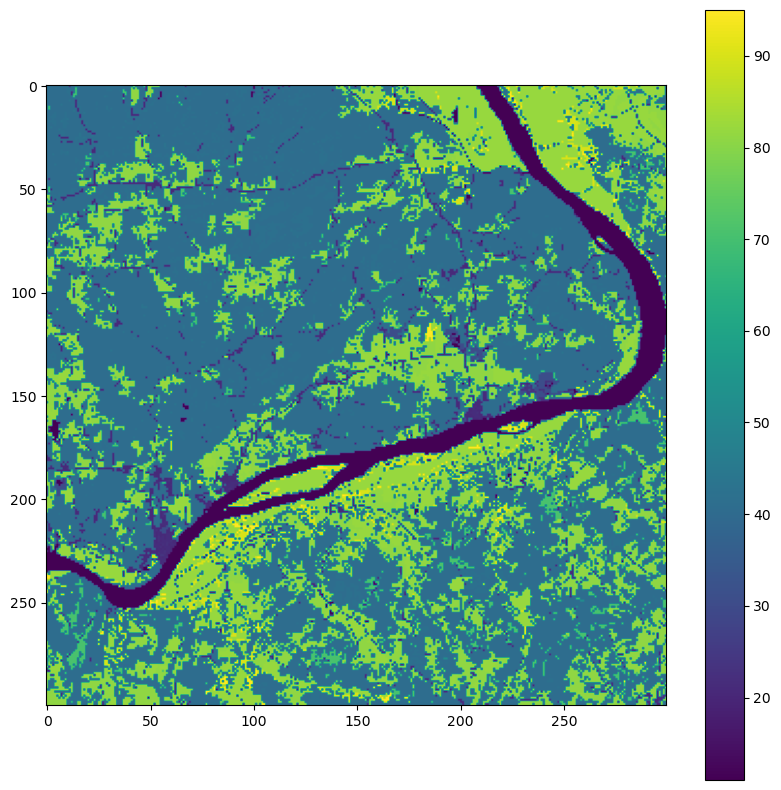

In [130]:
create_stats(files, xoff=10000, yoff=3000)

### Previous Testing

This is where I was creating the csv function.

In [59]:
df_2001 = preprocess(file_2001, 2001)
df_2004 = preprocess(file_2004, 2004)
df_2006 = preprocess(file_2006, 2006)
df_2008 = preprocess(file_2008, 2008)
df_2011 = preprocess(file_2011, 2011)
df_2013 = preprocess(file_2013, 2013)
df_2016 = preprocess(file_2016, 2016)
df_2019 = preprocess(file_2019, 2019)

In [60]:
df_01 = pd.read_csv('./data/preprocess/ds_2001_tw.csv')
df_04 = pd.read_csv('./data/preprocess/ds_2004_tw.csv')
df_06 = pd.read_csv('./data/preprocess/ds_2006_tw.csv')
df_08 = pd.read_csv('./data/preprocess/ds_2008_tw.csv')
df_11 = pd.read_csv('./data/preprocess/ds_2011_tw.csv')
df_13 = pd.read_csv('./data/preprocess/ds_2013_tw.csv')
df_16 = pd.read_csv('./data/preprocess/ds_2016_tw.csv')
df_19 = pd.read_csv('./data/preprocess/ds_2019_tw.csv')

In [74]:
df_01

,id,X,Y,2001
0,0,604778.743636,1.497500e+06,21
1,1,604878.743636,1.497500e+06,21
2,2,604978.743636,1.497500e+06,82
3,3,605078.743636,1.497500e+06,82
4,4,605178.743636,1.497500e+06,82
...,...,...,...,...
89995,89995,634278.743636,1.467600e+06,42
89996,89996,634378.743636,1.467600e+06,41
89997,89997,634478.743636,1.467600e+06,82
89998,89998,634578.743636,1.467600e+06,21


In [62]:
df_01 = df_01.rename(columns={"Unnamed: 0": "id", "x": "X", "y": "Y", "value": "value"})

In [63]:
frames = [df_01['id'], df_01['X'], df_01['Y'], df_01['2001'], df_04['2004'], df_06['2006'], df_08['2008'], df_11['2011'], df_13['2013'], df_16['2016'], df_19['2019']]
result = pd.concat(frames, axis=1)

In [64]:
result

,id,X,Y,2001,2004,2006,2008,2011,2013,2016,2019
0,0,604778.743636,1.497500e+06,21,82,21,82,82,21,82,82
1,1,604878.743636,1.497500e+06,21,81,21,81,81,21,81,81
2,2,604978.743636,1.497500e+06,82,81,82,81,81,82,81,81
3,3,605078.743636,1.497500e+06,82,81,82,81,81,82,81,81
4,4,605178.743636,1.497500e+06,82,81,82,81,81,82,81,81
...,...,...,...,...,...,...,...,...,...,...,...
89995,89995,634278.743636,1.467600e+06,42,41,42,41,41,42,41,41
89996,89996,634378.743636,1.467600e+06,41,90,41,90,90,41,90,90
89997,89997,634478.743636,1.467600e+06,82,82,82,82,82,82,82,82
89998,89998,634578.743636,1.467600e+06,21,82,21,82,82,21,82,82


In [66]:
result.to_csv('./data/stats.csv')

## Previous Testing

This is where I was messing to create the preprocess function.

In [4]:
# Convert to GDAL dataset
ds_2001 = gdal.Open(file_2001)
ds_2004 = gdal.Open(file_2004)
ds_2006 = gdal.Open(file_2006)
ds_2008 = gdal.Open(file_2008)
ds_2011 = gdal.Open(file_2011)
ds_2013 = gdal.Open(file_2013)
ds_2016 = gdal.Open(file_2016)
ds_2019 = gdal.Open(file_2019)

In [7]:
ds_2001_t = gdal.Translate('./data/subset_tif/ds_2001_t.tif', ds_2001, srcWin = [8000, 8000, 1000, 1000])
ds_2004_t = gdal.Translate('./data/subset_tif/ds_2004_t.tif', ds_2004, srcWin = [8000, 8000, 1000, 1000])
ds_2006_t = gdal.Translate('./data/subset_tif/ds_2006_t.tif', ds_2006, srcWin = [8000, 8000, 1000, 1000])
ds_2008_t = gdal.Translate('./data/subset_tif/ds_2008_t.tif', ds_2008, srcWin = [8000, 8000, 1000, 1000])
ds_2011_t = gdal.Translate('./data/subset_tif/ds_2011_t.tif', ds_2011, srcWin = [8000, 8000, 1000, 1000])
ds_2013_t = gdal.Translate('./data/subset_tif/ds_2013_t.tif', ds_2013, srcWin = [8000, 8000, 1000, 1000])
ds_2016_t = gdal.Translate('./data/subset_tif/ds_2016_t.tif', ds_2016, srcWin = [8000, 8000, 1000, 1000])
ds_2019_t = gdal.Translate('./data/subset_tif/ds_2019_t.tif', ds_2019, srcWin = [8000, 8000, 1000, 1000])

In [8]:
# Sample Visualization
band_2001_t = ds_2001_t.GetRasterBand(1)
array_2001_t = band_2001_t.ReadAsArray()

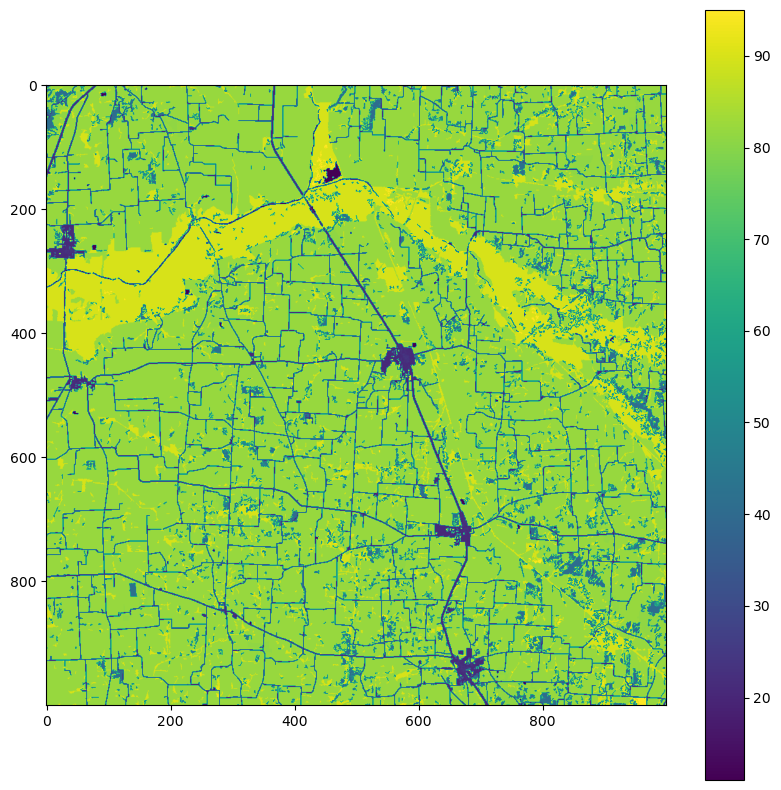

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(array_2001_t)
plt.colorbar()

In [17]:
# Can set different sampling methods
# Ex: resampleAlg = "bilinear"
SIZE = 100
ds_2001_tw = gdal.Warp("./data/subset_tif/ds_2001_t_scaled.tif", ds_2001_t, xRes = SIZE, yRes = SIZE)
ds_2004_tw = gdal.Warp("./data/subset_tif/ds_2004_t_scaled.tif", ds_2004_t, xRes = SIZE, yRes = SIZE)
ds_2006_tw = gdal.Warp("./data/subset_tif/ds_2006_t_scaled.tif", ds_2006_t, xRes = SIZE, yRes = SIZE)
ds_2008_tw = gdal.Warp("./data/subset_tif/ds_2008_t_scaled.tif", ds_2008_t, xRes = SIZE, yRes = SIZE)
ds_2011_tw = gdal.Warp("./data/subset_tif/ds_2011_t_scaled.tif", ds_2011_t, xRes = SIZE, yRes = SIZE)
ds_2013_tw = gdal.Warp("./data/subset_tif/ds_2013_t_scaled.tif", ds_2013_t, xRes = SIZE, yRes = SIZE)
ds_2016_tw = gdal.Warp("./data/subset_tif/ds_2016_t_scaled.tif", ds_2016_t, xRes = SIZE, yRes = SIZE)
ds_2019_tw = gdal.Warp("./data/subset_tif/ds_2019_t_scaled.tif", ds_2019_t, xRes = SIZE, yRes = SIZE)

In [18]:
# Sample Visualization
band_2001_tw = ds_2001_tw.GetRasterBand(1)
array_2001_tw = band_2001_tw.ReadAsArray()

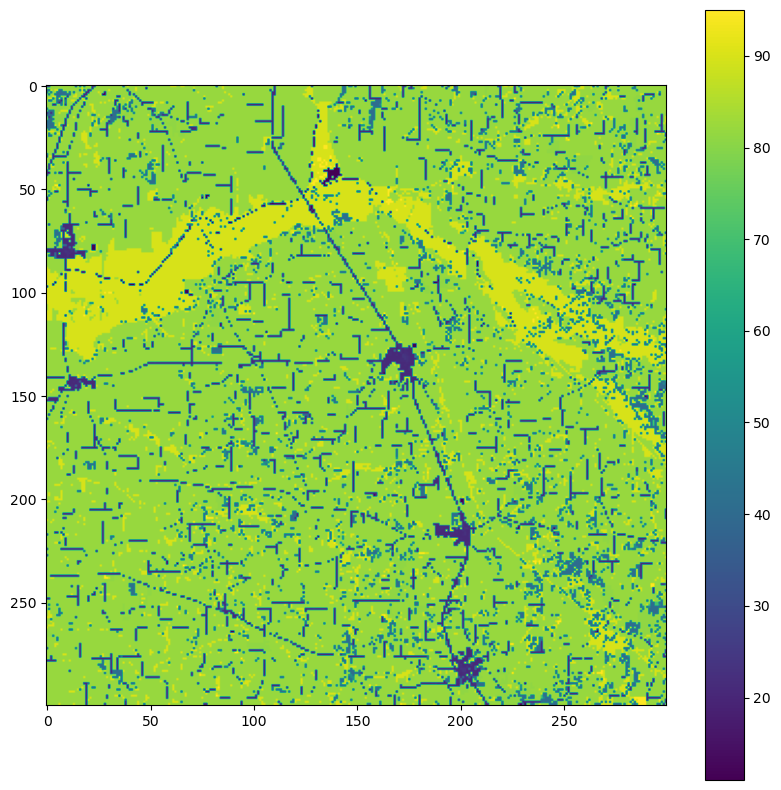

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(array_2001_tw)
plt.colorbar()